In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
df = pd.read_csv("survey_results_public.csv", index_col="Respondent", usecols=["Respondent","MainBranch", "UndergradMajor"])

df["MainBranch"] = df["MainBranch"].str.replace("I am not primarily a developer, but I write code sometimes as part of my work","I am not primarily a developer, \nbut I write code sometimes as part of my work")
df["MainBranch"] = df["MainBranch"].str.replace('I used to be a developer by profession, but no longer am','I used to be a developer by profession, \nbut no longer am')
df["UndergradMajor"] = df["UndergradMajor"].str.replace("Computer science, computer engineering, or software engineering","Computer science, computer engineering, \nor software engineering")
df["UndergradMajor"] = df["UndergradMajor"].str.replace("Information systems, information technology, or system administration","Information systems, information technology, \nor system administration")
df["UndergradMajor"] = df["UndergradMajor"].replace("Another engineering discipline (ex. civil, electrical, mechanical)","Another engineering discipline \n(ex. civil, electrical, mechanical)")

df["MainBranch"] = df["MainBranch"].astype("category")
df["UndergradMajor"] = df["UndergradMajor"].astype("category")

df.head()

,MainBranch,UndergradMajor
Respondent,,
1,I am a student who is learning to code,NaN
2,I am a student who is learning to code,NaN
3,"I am not primarily a developer, \nbut I write ...",Web development or web design
4,I am a developer by profession,"Computer science, computer engineering, \nor s..."
5,I am a developer by profession,"Computer science, computer engineering, \nor s..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88883 entries, 1 to 88863
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   MainBranch      88331 non-null  category
 1   UndergradMajor  75614 non-null  category
dtypes: category(2)
memory usage: 868.6 KB


In [4]:
df_0 = df.groupby(["UndergradMajor", "MainBranch"]).size().to_frame(name='count').reset_index()
df_0.head()

,UndergradMajor,MainBranch,count
0,"A business discipline (ex. accounting, finance...",I am a developer by profession,1142
1,"A business discipline (ex. accounting, finance...",I am a student who is learning to code,163
2,"A business discipline (ex. accounting, finance...","I am not primarily a developer, \nbut I write ...",359
3,"A business discipline (ex. accounting, finance...",I code primarily as a hobby,124
4,"A business discipline (ex. accounting, finance...","I used to be a developer by profession, \nbut ...",41


In [5]:
top_countries = df_0.groupby("UndergradMajor").sum().sort_values(by="count", ascending=False).head(6)
lists = list(top_countries.index)
lists

['Computer science, computer engineering, \nor software engineering',
 'Another engineering discipline \n(ex. civil, electrical, mechanical)',
 'Information systems, information technology, \nor system administration',
 'Web development or web design',
 'A natural science (ex. biology, chemistry, physics)',
 'Mathematics or statistics']

In [6]:
df_1 = pd.DataFrame()
for i in range(0,len(lists)):
    data_2 = df_0.groupby("UndergradMajor").get_group(lists[i])
    df_1 = df_1.append(data_2)
df_1.head()

,UndergradMajor,MainBranch,count
30,"Computer science, computer engineering, \nor s...",I am a developer by profession,39886
31,"Computer science, computer engineering, \nor s...",I am a student who is learning to code,3527
32,"Computer science, computer engineering, \nor s...","I am not primarily a developer, \nbut I write ...",2389
33,"Computer science, computer engineering, \nor s...",I code primarily as a hobby,489
34,"Computer science, computer engineering, \nor s...","I used to be a developer by profession, \nbut ...",823


In [7]:
df_1_1 = df_1.groupby("UndergradMajor")["count"].sum().sort_values(ascending=False).to_frame().reset_index()
df_1_1["percent"] = round((100.*df_1_1["count"]/df_1_1["count"].sum()),1)
df_1_1.head()

,UndergradMajor,count,percent
0,"Computer science, computer engineering, \nor s...",47114,69.2
1,"Another engineering discipline \n(ex. civil, e...",6189,9.1
2,"Information systems, information technology, \...",5228,7.7
3,Web development or web design,3409,5.0
4,"A natural science (ex. biology, chemistry, phy...",3214,4.7


In [8]:
df_1_2 = df_1.groupby("MainBranch")["count"].sum().sort_values(ascending=False).to_frame().reset_index()
df_1_2["percent"] = round((100.*df_1_2["count"]/df_1_2["count"].sum()),1)
df_1_2

,MainBranch,count,percent
0,I am a developer by profession,55206,81.1
1,"I am not primarily a developer, \nbut I write ...",5522,8.1
2,I am a student who is learning to code,4954,7.3
3,"I used to be a developer by profession, \nbut ...",1285,1.9
4,I code primarily as a hobby,1142,1.7


In [9]:
df_2 = df_1.pivot_table(index="MainBranch", columns="UndergradMajor", values="count")
df_2 = df_2.reindex(lists, axis=1)  
df_2

UndergradMajor,"Computer science, computer engineering, \nor software engineering","Another engineering discipline \n(ex. civil, electrical, mechanical)","Information systems, information technology, \nor system administration",Web development or web design,"A natural science (ex. biology, chemistry, physics)",Mathematics or statistics
MainBranch,,,,,,
I am a developer by profession,39886,4469,3922,2701,2125,2103
I am a student who is learning to code,3527,297,378,440,149,163
"I am not primarily a developer, \nbut I write code sometimes as part of my work",2389,1050,673,142,764,504
I code primarily as a hobby,489,250,124,78,97,104
"I used to be a developer by profession, \nbut no longer am",823,123,131,48,79,81


In [10]:
df_2_per = round(((df_2 / df_2.sum().sum())*100),2)
df_2_1 = df_2.astype(str) + '\n' + '(' + df_2_per.astype(str) + ' %)'
df_2_1

UndergradMajor,"Computer science, computer engineering, \nor software engineering","Another engineering discipline \n(ex. civil, electrical, mechanical)","Information systems, information technology, \nor system administration",Web development or web design,"A natural science (ex. biology, chemistry, physics)",Mathematics or statistics
MainBranch,,,,,,
I am a developer by profession,39886\n(58.56 %),4469\n(6.56 %),3922\n(5.76 %),2701\n(3.97 %),2125\n(3.12 %),2103\n(3.09 %)
I am a student who is learning to code,3527\n(5.18 %),297\n(0.44 %),378\n(0.55 %),440\n(0.65 %),149\n(0.22 %),163\n(0.24 %)
"I am not primarily a developer, \nbut I write code sometimes as part of my work",2389\n(3.51 %),1050\n(1.54 %),673\n(0.99 %),142\n(0.21 %),764\n(1.12 %),504\n(0.74 %)
I code primarily as a hobby,489\n(0.72 %),250\n(0.37 %),124\n(0.18 %),78\n(0.11 %),97\n(0.14 %),104\n(0.15 %)
"I used to be a developer by profession, \nbut no longer am",823\n(1.21 %),123\n(0.18 %),131\n(0.19 %),48\n(0.07 %),79\n(0.12 %),81\n(0.12 %)


In [11]:
df_3 = df_1.pivot_table(index="UndergradMajor", columns="MainBranch", values="count")
df_3 = df_3.reindex(lists, axis=0)
df_3

MainBranch,I am a developer by profession,I am a student who is learning to code,"I am not primarily a developer, \nbut I write code sometimes as part of my work",I code primarily as a hobby,"I used to be a developer by profession, \nbut no longer am"
UndergradMajor,,,,,
"Computer science, computer engineering, \nor software engineering",39886,3527,2389,489,823
"Another engineering discipline \n(ex. civil, electrical, mechanical)",4469,297,1050,250,123
"Information systems, information technology, \nor system administration",3922,378,673,124,131
Web development or web design,2701,440,142,78,48
"A natural science (ex. biology, chemistry, physics)",2125,149,764,97,79
Mathematics or statistics,2103,163,504,104,81


In [12]:
df_3_per = round(((df_3 / df_3.sum().sum())*100),2)
df_3_1 = df_3.astype(str) + '\n' + '(' + df_3_per.astype(str) + ' %)'
df_3_1

# df_3_1 = df_3_1.transpose()
# df_3_1

MainBranch,I am a developer by profession,I am a student who is learning to code,"I am not primarily a developer, \nbut I write code sometimes as part of my work",I code primarily as a hobby,"I used to be a developer by profession, \nbut no longer am"
UndergradMajor,,,,,
"Computer science, computer engineering, \nor software engineering",39886\n(58.56 %),3527\n(5.18 %),2389\n(3.51 %),489\n(0.72 %),823\n(1.21 %)
"Another engineering discipline \n(ex. civil, electrical, mechanical)",4469\n(6.56 %),297\n(0.44 %),1050\n(1.54 %),250\n(0.37 %),123\n(0.18 %)
"Information systems, information technology, \nor system administration",3922\n(5.76 %),378\n(0.55 %),673\n(0.99 %),124\n(0.18 %),131\n(0.19 %)
Web development or web design,2701\n(3.97 %),440\n(0.65 %),142\n(0.21 %),78\n(0.11 %),48\n(0.07 %)
"A natural science (ex. biology, chemistry, physics)",2125\n(3.12 %),149\n(0.22 %),764\n(1.12 %),97\n(0.14 %),79\n(0.12 %)
Mathematics or statistics,2103\n(3.09 %),163\n(0.24 %),504\n(0.74 %),104\n(0.15 %),81\n(0.12 %)


<h1 style='color:red'>FUNCTIONS</h1>

In [13]:
######################
# ax1 (top)
######################
def total_bar_graph_annotate(df):
    for idx, acc in enumerate(list(df.columns)): 
        value=df[acc].sum()
        percent = f"({value} - {value*100/df_1['count'].sum():1.1f}%)" 
#         percent = f"({value} - {value*100/df.sum().sum():1.1f}%)" 
        ax1.annotate(percent, xy=(value+300, idx), xycoords="data",   
                        va='center', ha='left', rotation=0)
    
######################
# ax2 (bottom-left)
######################
def table_customization (table, df, index, columns, min, max):
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    cellDict = table.get_celld()

    for i in range(0,len(index)):
        for j in range(0,len(columns)):
            if i==0:
                cellDict[(i,j)].set_height(0.07)
                cellDict[(i,j)].set_width(0.10)

    for i in range(1,len(index)+1):
        cellDict[(i,-1)].set_height(0.17)
        cellDict[(i,-1)].set_width(0.30)
        cellDict[(i,-1)].set_fontsize(10)
        cellDict[(i,-1)].set_text_props(weight='bold', color='k')
        for j in range(0,len(columns)):
            cellDict[(i,j)].set_height(0.17)
            if (i%2 == 0):
                cellDict[(i,j)].set_facecolor('gainsboro')
            else:
                cellDict[(i,j)].set_facecolor('w')

        for i,[j,k] in enumerate(df.iterrows(), start=1):
            for m, l in enumerate(k):
                if (l<min):
                    cellDict[(i,m)].set_facecolor('y')
                elif l>max:
                    cellDict[(i,m)].set_facecolor('g')

######################
# ax3 (bottom-middle)
######################
def autopct(pct, allvals):
    if pct<5:
        return ""
    else:
        absolute = int(pct/100.*sum(allvals))
        return "{p:.1f}%".format(p=pct)
#         return "{p:.1f}% \n({val})".format(p=pct, val=absolute)              
                
def pie_annotate(ax, df, wedges, angleA, x1, y1):
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center", ha="center")

    df_filt = df[(df["count"] != 0) & (df["percent"]<5)]
    values = [f"{i:1.1f}%" for i,j in zip(df["percent"], df["count"])]

    for i, p in enumerate(wedges):
        if i in df_filt.index:
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = f"angle,angleA={angleA},angleB={ang}"
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            ax.annotate(values[i], xy=(x, y), xytext=(x1*np.sign(x), y1*y),
                        horizontalalignment=horizontalalignment, **kw)

<h1 style='color:red'>GRAPHS-1</h1>

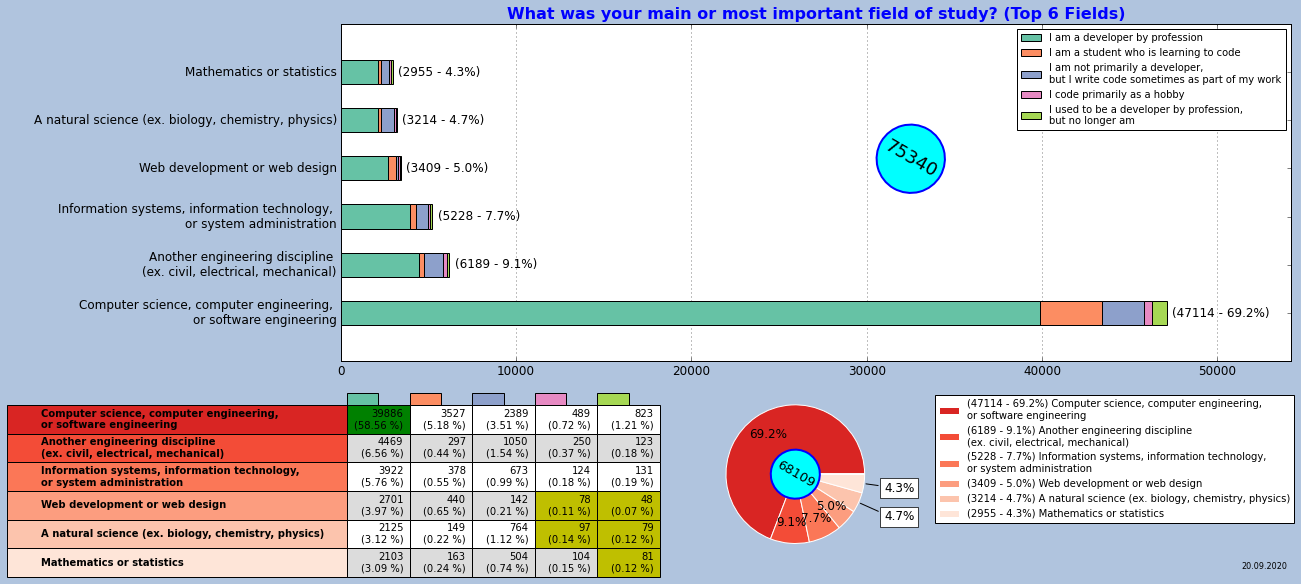

In [18]:
%matplotlib inline
fig = plt.figure(constrained_layout=True, figsize=(18,8), facecolor='lightsteelblue')
plt.figtext(0.99, 0.02, "20.09.2020", horizontalalignment='right', size=8, weight='light')
matplotlib.style.use('classic')

widths = [1.3, 1, 1.5]
heights = [2, 1]
gs_kw = dict(height_ratios=heights)
gs = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
######################
# ax1 (top)
######################
index = np.arange(len(df_2.columns))
bar_width = 0.5
y_offset = np.zeros(len(df_2.columns))

cmap_red = plt.get_cmap('Reds')
colors_row = cmap_red(np.linspace(0.7, 0.1, len(df_2.columns)))
cmap = plt.get_cmap("Set2")
colors_column = []
for i in range(0,len(df_3.columns)):
    colors_column.append(cmap(i))

cell_text = []
for i in range(len(df_2)):
    ax1.barh(index, df_2.values[i], bar_width, left=y_offset, color=cmap(i), zorder=3)
    y_offset = y_offset + df_2.values[i]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
    
# Circle
bbox_props = dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
ax1.text(0.6, 0.6, df_0['count'].sum(), ha="center", va="center", rotation=-30, size=18, transform=ax1.transAxes,
            bbox=bbox_props)

total_bar_graph_annotate(df_2) #------function
######################
# ax2 (bottom-left)
######################
df_3_empty_col = [""]*(len(df_3.columns)+1)
table_1 = ax2.table(cellText=df_3_1.values, rowLabels=df_3.index, colLabels=df_3_empty_col, loc="upper left", zorder=3, 
                    rowColours=colors_row, colColours=colors_column,)

table_customization(table=table_1, df=df_3, index=df_3.index, columns=df_3.columns, min=100, max=10000) #------function
######################
# ax3 (bottom-middle)
######################
textprops = dict(horizontalalignment="center", verticalalignment="center", rotation=0, rotation_mode="anchor",
                size=12, color="black")
wedgeprops=dict(width=1, edgecolor="w", linewidth=1)

wedges, texts, autotexts = ax3.pie(df_1_1["count"], radius=1, startangle=0, 
                            autopct=lambda pct: autopct(pct, df_1_1["count"]), #------function
                            textprops=textprops, wedgeprops=wedgeprops,
                            counterclock=True, pctdistance = 0.7, colors=colors_row)

pie_annotate(ax3, df_1_1, wedges, 120, 1.5, 1.5) #------function

# Circle
bbox_props = dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
ax3.text(0, 0, df_3.sum().sum(), ha="center", va="center", rotation=-30, size=13, bbox=bbox_props)  
######################
# ax4 (bottom-right)
######################
labels = [f"({k} - {j:1.1f}%) {i}" for i,j,k in zip(lists, df_1_1["percent"], df_1_1["count"])]
ax4.legend(wedges, labels, fontsize=10, loc="upper left", prop={'size': 10})
#---------------------------------------------------------------#
########################################################################################
ax1.legend(df_2.index, fontsize=10, bbox_to_anchor=(1,1,0,0))
ax1.set_title("What was your main or most important field of study? (Top 6 Fields)", fontsize=16, color='b', weight='bold')
ax1.grid(axis='x', zorder=0)
ax1.set_yticks(range(len(df_2.columns)))
ax1.set_yticklabels(df_2.columns, fontsize=12)
ax1.set_xlim([0, int(df_1_1["count"].max())*1.15])
# ax1.invert_yaxis()
ax2.axis("off")
ax3.axis("off")
ax3.axis('equal')
ax4.axis("off")
########################################################################################
plt.show()

<h1 style='color:red'>GRAPHS-2</h1>

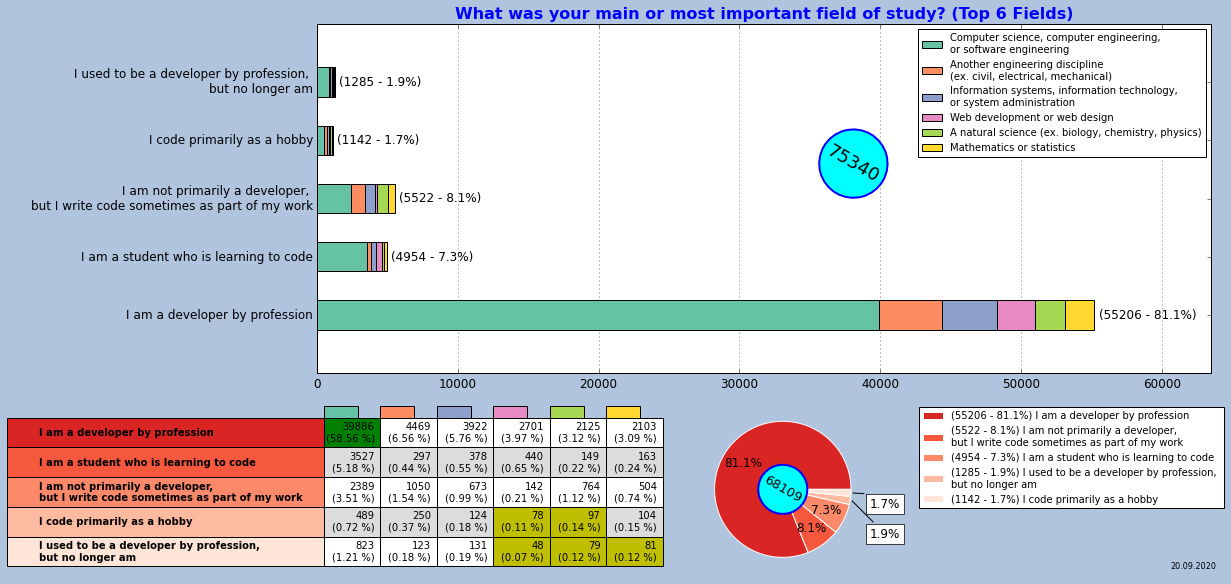

In [15]:
%matplotlib inline
fig = plt.figure(constrained_layout=True, figsize=(17,8), facecolor='lightsteelblue')
plt.figtext(0.99, 0.02, "20.09.2020", horizontalalignment='right', size=8, weight='light')
matplotlib.style.use('classic')

widths = [1.6, 1, 1.4]
heights = [2, 1]
gs_kw = dict(height_ratios=heights)
gs = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
######################
# ax1 (top)
######################
index = np.arange(len(df_3.columns))
bar_width = 0.5
y_offset = np.zeros(len(df_3.columns))

cmap_red = plt.get_cmap('Reds')
colors_row = cmap_red(np.linspace(0.7, 0.1, len(df_3.columns)))
cmap = plt.get_cmap("Set2")    
colors_column = []
for i in range(0,len(df_2.columns)):
    colors_column.append(cmap(i))

cell_text = []
for i in range(len(df_3)):
    ax1.barh(index, df_3.values[i], bar_width, left=y_offset, color=cmap(i), zorder=3)
    y_offset = y_offset + df_3.values[i]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])

# Circle
bbox_props = dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
ax1.text(0.6, 0.6, df_0['count'].sum(), ha="center", va="center", rotation=-30, size=18, transform=ax1.transAxes,
            bbox=bbox_props)
    
total_bar_graph_annotate(df_3)
######################
# ax2 (bottom-left)
######################
df_2_empty_col = [""]*(len(df_2.columns)+1)
table_2 = ax2.table(cellText=df_2_1.values, rowLabels=df_2.index, colLabels=df_2_empty_col, loc="upper left", zorder=3, 
                    rowColours=colors_row, colColours=colors_column,)

table_customization(table=table_2, df=df_2, index=df_2.index, columns=df_2.columns, min=100, max=10000)
######################
# ax3 (bottom-middle)
######################
textprops = dict(horizontalalignment="center", verticalalignment="center", rotation=0, rotation_mode="anchor",
                size=12, color="black")
wedgeprops=dict(width=1, edgecolor="w", linewidth=1)

wedges, texts, autotexts = ax3.pie(df_1_2["count"], radius=1, startangle=0, 
                            autopct=lambda pct: autopct(pct, df_1_2["count"]), #------function
                            textprops=textprops, wedgeprops=wedgeprops,
                            counterclock=True, pctdistance = 0.7, colors=colors_row)

pie_annotate(ax3, df_1_2, wedges, 135, 1.5, 4) #------function

# Circle
bbox_props = dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
ax3.text(0, 0, df_3.sum().sum(), ha="center", va="center", rotation=-30, size=13, bbox=bbox_props)    

######################
# ax4 (bottom-right)
######################

# labels_OS_1 = [f"({i:}) {j}" for i,j in zip(df_1_2.values, df_1_2.index)]
# ax4.legend(pie[0], labels_OS_1, fontsize=10, loc="upper left")

labels = [f"({k} - {j:1.1f}%) {i}" for i,j,k in zip(df_1_2["MainBranch"], df_1_2["percent"], df_1_2["count"])]
ax4.legend(wedges, labels, fontsize=10, loc="upper left", prop={'size': 10})
#---------------------------------------------------------------#
########################################################################################
ax1.legend(df_3.index, fontsize=10, bbox_to_anchor=(1,1,0,0))
ax1.set_title("What was your main or most important field of study? (Top 6 Fields)", fontsize=16, color='b', weight='bold')
ax1.grid(axis='x', zorder=0)
ax1.set_yticks(range(len(df_3.columns)))
ax1.set_yticklabels(df_3.columns, fontsize=12)
ax1.set_xlim([0, int(df_1_2["count"].max())*1.15])
ax2.axis("off")
ax3.axis('equal')
ax4.axis("off")
########################################################################################
plt.show()